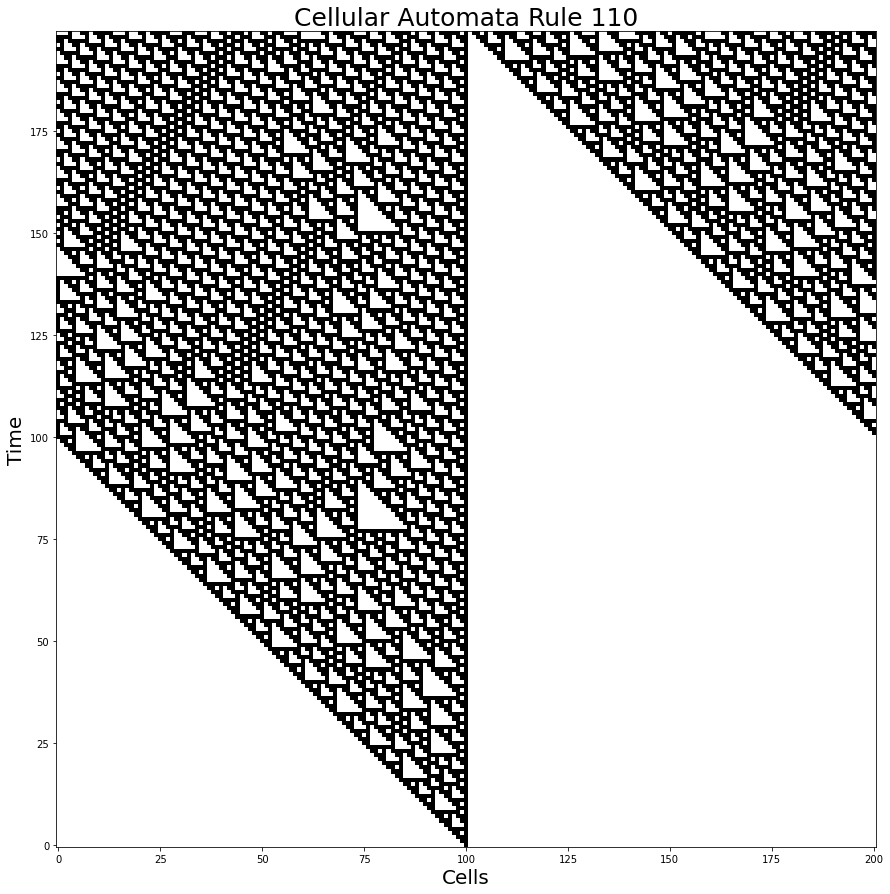

In [2]:
import numpy as np
import matplotlib.pyplot as plt
number = 110 #rule number
output_pattern = [int(x) for x in np.binary_repr(number,width=8)]
input_pattern = np.zeros([8,3])
for i in range(8):
    input_pattern[i, :] = [int(x) for x in np.binary_repr(7-i, width = 3)]
columns = 201
rows = 200 #shows time
shape = np.zeros([rows, columns+2])
shape[0,int(columns/2)+1] = 1 #the middle cell 
A = np.zeros([rows, 4])

for i in np.arange(0, rows-1):
    for j in np.arange(1,columns+1):
         for k in range(8): #8 different states of neighbourhood
                if j<198:
                    if np.array_equal(input_pattern[k,:],shape[i,j%201:(j+3)%201]): #which state the cell and its neighbours have
                        shape[i+1,(j+1)%201] = output_pattern[k] #determines the middle cell in neighbourhood for next step
            
                if j == 198:
                    A[i,1] = shape[i,198]
                    A[i,2] = shape[i,199]
                    A[i,3] = shape[i,200]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,199] = output_pattern[k]  
            
                if j == 199:
                    A[i,1] = shape[i,199]
                    A[i,2] = shape[i,200]
                    A[i,3] = shape[i,201]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,200] = output_pattern[k]                           
                if j == 200:
                    A[i,1] = shape[i,200]
                    A[i,2] = shape[i,201]
                    A[i,3] = shape[i,1]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,201] = output_pattern[k]
                if j == 201:
                    A[i,1] = shape[i,201]
                    A[i,2] = shape[i,1]
                    A[i,3] = shape[i,2]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,1] = output_pattern[k] 
                        
plt.figure(figsize=(15,15))
plt.imshow(shape[:,1:columns+1], cmap = 'Greys', interpolation = 'nearest', origin='lower')
plt.title("Cellular Automata Rule {}".format(number),fontsize = 25)
plt.xlabel('Cells', fontsize = 20)
plt.ylabel('Time', fontsize = 20)
plt.show()